<a href="https://colab.research.google.com/github/AL-Fourfinger/AnyGPT/blob/main/1_Introduction_to_Generative_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Google Colab

Welcome to this tutorial on Google Colab! In this notebook, we'll explore the basics of using Google Colab, a powerful cloud-based platform for writing and executing Python code, particularly useful for machine learning and data science projects.

## What is Google Colab?

Google Colab, short for Colaboratory, is a free, cloud-based Jupyter notebook environment that requires no setup and runs entirely in the cloud. It allows you to write and execute Python code through your browser, and is especially well-suited to machine learning, data analysis and education.

Key features of Google Colab include:
- Free access to GPUs and TPUs
- Easy sharing and collaboration
- Integration with Google Drive
- Pre-installed popular libraries

Let's dive in and explore how to use Google Colab!

## Accessing Google Colab

To access Google Colab:

1. Go to [colab.research.google.com](https://colab.research.google.com)
2. Sign in with your Google account
3. Click on 'New Notebook' to create a new Colab notebook

You can also open existing notebooks from your Google Drive or GitHub repositories.

## Basic Interface Overview

The Google Colab interface is similar to Jupyter notebooks:

- The main area is where you write and execute code or markdown
- The left sidebar contains a table of contents and file browser
- The top menu bar provides various options for file management, runtime settings, and more

Colab notebooks consist of two types of cells: code cells and text cells (markdown).

## Creating and Running Code Cells

To create a new code cell, click the '+ Code' button in the toolbar or use the keyboard shortcut 'Ctrl+M B'.

Let's try running a simple Python code:

In [1]:
print("Hello, Google Colab!")

# Simple calculation
result = 5 * 7
print(f"5 * 7 = {result}")

Hello, Google Colab!
5 * 7 = 35


In [4]:
# prompt: frage nach dem Alter, lass das eingeben und schreibe dann Peter ist Alter alt

alter = input("Wie alt ist Peter? ")
print("Peter ist", alter, "Jahre alt.")


Wie alt ist Peter? 60
Peter ist 60 Jahre alt.


In [3]:
print ("mal sehen ob das klappt")

mal sehen ob das klappt


To run a code cell, you can click the play button on the left side of the cell or use the keyboard shortcut 'Shift+Enter'.

## Working with Markdown Cells

Markdown cells are used for adding formatted text, images, and equations to your notebook. To create a new markdown cell, click the '+ Text' button in the toolbar or use the keyboard shortcut 'Ctrl+M M'.

Here are some examples of markdown formatting:

# Heading 1
## Heading 2
### Heading 3

- Bullet point 1
- Bullet point 2

1. Numbered list item 1
2. Numbered list item 2

*Italic text*
**Bold text**

[Link to Google](https://www.google.com)

Inline equation: $E = mc^2$

Block equation:
$$
\frac{d}{dx}e^x = e^x
$$

To edit a markdown cell, double-click on it or use the keyboard shortcut 'Enter' when the cell is selected.

## Using GPU Acceleration

One of the great features of Google Colab is free access to GPU acceleration. To use a GPU:

1. Go to 'Runtime' in the top menu
2. Select 'Change runtime type'
3. Choose 'GPU' from the Hardware accelerator dropdown
4. Click 'Save'

Let's verify if we have GPU access:

In [3]:
import tensorflow as tf
print("GPU Available: ", tf.test.is_gpu_available())

# If GPU is available, this will print out GPU device info
if tf.test.is_gpu_available():
    print(tf.test.gpu_device_name())

GPU Available:  True
/device:GPU:0


## Importing and Using Libraries

Google Colab comes with many pre-installed libraries, especially those commonly used in data science and machine learning. You can import and use these libraries just like in a local Python environment.

Let's import some common libraries and use them:

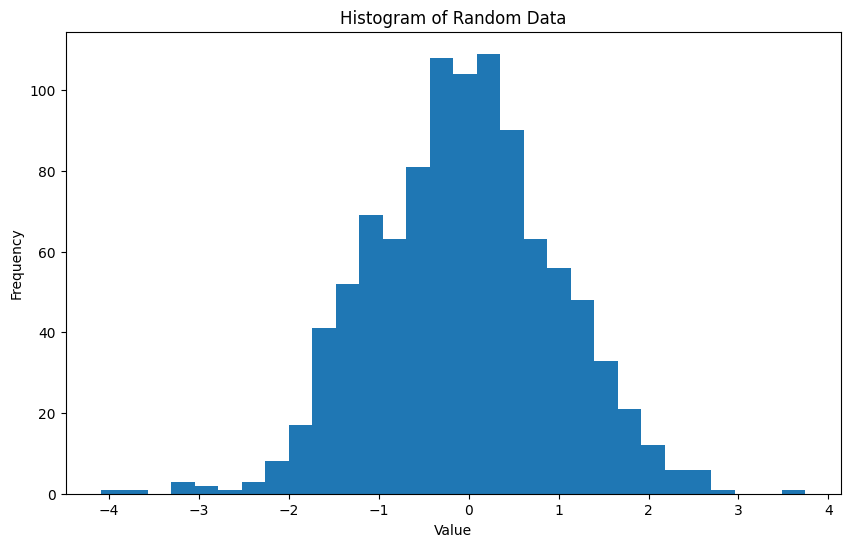

     values
0 -1.834555
1 -0.180390
2  0.262029
3 -0.316467
4  0.330324


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create some sample data
data = np.random.randn(1000)

# Create a DataFrame
df = pd.DataFrame(data, columns=['values'])

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['values'], bins=30)
plt.title('Histogram of Random Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Display first few rows of the DataFrame
print(df.head())

## Mounting Google Drive

Google Colab can easily integrate with Google Drive, allowing you to save and load files directly from your Drive. Here's how to mount your Google Drive:

In [5]:
from google.colab import drive
drive.mount('/content/drive')

# After running this cell, follow the authorization link and enter the code

# Once mounted, you can access your Drive files like this:
# !ls /content/drive/My\ Drive/

Mounted at /content/drive


## Saving and Sharing Notebooks

Google Colab automatically saves your work to Google Drive. To manually save:
1. Go to 'File' in the top menu
2. Click 'Save' or 'Save a copy in Drive'

To share your notebook:
1. Click the 'Share' button in the top-right corner
2. Adjust sharing settings as needed (view-only or editable)
3. Copy the sharing link or add collaborators directly

You can also download your notebook in various formats, including .ipynb and .py, from the 'File' menu.

That concludes our introduction to Google Colab! You're now ready to explore more advanced features and start working on your own projects. Happy coding!

# Module 1: Introduction to Generative AI (GenAI)

Welcome to the first module of the Generative AI Teaching kit! </br>
This material was originally developed by [Prof. Sam Raymond](https://engineering.dartmouth.edu/community/faculty/sam-raymond) at the [Thayer School of Engineering, Dartmouth College](https://engineering.dartmouth.edu/) with support from [NVIDIA](https://www.nvidia.com/) and is designed to provide a resource to help you on your journey to master GenAI in this fast-paced, ever-evolving landscape.

Throughout this course you will be using notebooks like these to explore some of the different topics and tools that are covered in the lectures. You will also be given some homework notebooks where you will be taked to solve problems that require you to apply what will be covered in the lectures and these tutorial notebooks.

In this notebook, the code will be minimal, and instead the concepts and different aspects of GenAI will be shown to give you a feel for the kinds of tasks and problems to which GenAI can be applied.


---



# Part 1 - HuggingFace 🤗: The Hub of Open Source GenAI

We start our journey into GenAI by introducing, arguably, the most important platform in the entire field. HuggingFace is a company devoted to providing access, support, and software relating to all things GenAI. Akin to GitHub, HuggingFace hosts any and all open sourced models, making them free to download and interact with. They also develop and maintain, among others, the `transformers` Python library, which is by far the most popular and well developed library for interacting with, and traning large language models.

In [ ]:
# !pip install -Uqqq torch transformers diffusers pydub openai-whisper accelerate sentencepiece numba

In [ ]:
!pip install -q transformers diffusers torch pydub TTS openai-whisper accelerate numba

In [ ]:
USE_CUDA = True

In [ ]:
import torch

def check_cuda():
    # Check if CUDA is available
    if USE_CUDA and torch.cuda.is_available():
        print("CUDA is available.")

        # Get the CUDA device name
        cuda_device = torch.cuda.get_device_name(0)
        print(f"CUDA Device: {cuda_device}")

        # Perform a simple tensor operation on the GPU
        x = torch.tensor([1.0, 2.0, 3.0], device='cuda')
        y = torch.tensor([4.0, 5.0, 6.0], device='cuda')
        z = x + y
        print(f"Tensor operation result: {z}")

    else:
        print("CUDA is not available.")

# Run the CUDA check
check_cuda()


In [ ]:
# Import necessary libraries
from transformers import pipeline, GPT2LMHeadModel, GPT2Tokenizer
from transformers import LlamaTokenizer, LlamaForCausalLM
from diffusers import StableDiffusionPipeline
from PIL import Image
from IPython.display import Audio, display
import torch
import numpy as np
from TTS.api import TTS
# from transformers import VitsModel, AutoTokenizer
import whisper
# import scipy
from numba import cuda
device = cuda.get_current_device()
# Text Generation using GPT-2
def generate_text(prompt):
    model_name = "gpt2-medium"
    device = "cuda" if USE_CUDA and torch.cuda.is_available() else "cpu"
    model = GPT2LMHeadModel.from_pretrained(model_name).to(device)
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    outputs = model.generate(inputs["input_ids"], max_length=50, num_return_sequences=1)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Text Translation using MarianMT
def translate_text(text, src_lang="en", tgt_lang="fr"):
    translation_pipeline = pipeline("translation", model=f"Helsinki-NLP/opus-mt-{src_lang}-{tgt_lang}")
    return translation_pipeline(text)[0]['translation_text']


def translate_en_hi(prompt):
    device = "cuda" if USE_CUDA and torch.cuda.is_available() else "cpu"
    tokenizer = LlamaTokenizer.from_pretrained('sarvamai/OpenHathi-7B-Hi-v0.1-Base')
    model = LlamaForCausalLM.from_pretrained('sarvamai/OpenHathi-7B-Hi-v0.1-Base', torch_dtype=torch.bfloat16).to(device)
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    # Generate
    generate_ids = model.generate(inputs.input_ids, max_length=30)
    return tokenizer.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]


# Image Generation using Stable Diffusion
def generate_image(prompt, output_path="generated_image.png"):
    model_id = "runwayml/stable-diffusion-v1-5"
    try:
        pipe = StableDiffusionPipeline.from_pretrained(
            model_id,
            torch_dtype=torch.float16,
            revision="fp16",
            low_cpu_mem_usage=True
        )
        pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")
        image = pipe(prompt, num_inference_steps=500, guidance_scale=7.5).images[0]

        # Save the image
        image.save(output_path)
        print(f"Image saved to {output_path}")

        # Show the image
        display(image)
    except Exception as e:
        print(f"An error occurred: {e}")

# Audio Generation using TTS
def generate_audio(text):
    tts = TTS(model_name="tts_models/en/ljspeech/tacotron2-DDC", progress_bar=True, gpu=torch.cuda.is_available())
    tts.tts_to_file(text=text, file_path="output.wav")
    display(Audio("output.wav"))

# def generate_audio(text):
#     model = VitsModel.from_pretrained("facebook/mms-tts-eng")
#     tokenizer = AutoTokenizer.from_pretrained("facebook/mms-tts-eng")
#     inputs = tokenizer(text, return_tensors="pt")
#     with torch.no_grad():
#         output = model(**inputs).waveform
#         scipy.io.wavfile.write("output.wav", rate=model.config.sampling_rate, data=output.float().numpy())
#         Audio(output.numpy(), rate=model.config.sampling_rate)

# Speech-to-Text using Whisper
def transcribe_audio(file_path):
    model = whisper.load_model("base")
    result = model.transcribe(file_path)
    return result["text"]

In [ ]:
# Text Generation Example
text_prompt = "Once upon a time in a land far, far away"
generated_text = generate_text(text_prompt)
print("Generated Text:")
print(generated_text)

In [ ]:
device.reset()

In [ ]:
# Text Translation Example
text_to_translate = "Hello, how are you?"
translated_text = translate_text(text_to_translate)
print("\nTranslated Text (English to French):")
print(translated_text)

In [ ]:
device.reset()

In [ ]:
text_to_translate = "hello, how are you?"
translated_text = translate_en_hi(text_to_translate)
print("\nTranslated Text:\n",translated_text)

In [ ]:
# Image Generation Example
image_prompt = "A futuristic server farm with NVIDIA GPUs in outer space"
print("\nGenerating Image...")
generate_image(image_prompt)

In [ ]:
device.reset()

In [ ]:
# Audio Generation Example
audio_text = "This is a sample text to speech conversion using TTS."
print("\nGenerating Audio...")
generate_audio(audio_text)

In [ ]:
device.reset()

In [ ]:
# Speech-to-Text Example
audio_file_path = 'output.wav'
print("\nTranscribing Audio...")
transcribed_text = transcribe_audio(audio_file_path)
print("Transcribed Text:")
print(transcribed_text)

In [ ]:
device.reset()